In [114]:
import os
import pandas as pd
import subprocess
import time
import matplotlib.pyplot as plt
from tqdm import tqdm

In [101]:
INPUT_NAME = 'results'

In [102]:
files_lst = [itm for itm in os.listdir(INPUT_NAME) if '.csv' in itm]
df_lst = []

for name in files_lst:
    filename = os.path.join(INPUT_NAME, name)
    df = pd.read_csv(filename, sep=';', dtype=str)
    df_lst.append(df)

df = pd.concat(df_lst, axis=0)
df['rank '] = df['rank'].astype(int)
df['step'] = df['step'].astype(int)
print(df.shape)
df.head()

(4000, 4)


,rank,step,state,rank
0,0,0,1100011111101111111111101,0
1,0,1,1100110000111000000000111,0
2,0,2,0101110001101000000001101,0
3,0,3,1111010011111000000011111,0
4,0,4,1001110110001000000110000,0


In [103]:
df = (df
    .sort_values(['step', 'rank'])
    .groupby('step')['state']
    .agg(list)
    .apply(lambda x: ''.join(x) + '\n')
    .sort_index()
)
print(df.shape)
print(len(df[0]))
df.head()

(1000,)
101


step
0    1100011111101111111111101111010011011111111111...
1    1100110000111000000000111001110111110000000000...
2    0101110001101000000001101011011100010000000000...
3    1111010011111000000011111111110100110000000000...
4    1001110110001000000110000000011101110000000001...
Name: state, dtype: object

### Time measure

In [123]:
subprocess.run(["mkdir", "results"])
subprocess.run(["mpic++", "worker.h", "worker.cpp", "main.cpp"])
time_lst = []
proc_cnt_lst = [str(i) for i in range(2, 9, 2)]
state_len = "5000"
iter_cnt = "1000"

for proc in tqdm(proc_cnt_lst):
    start_time = time.time()
    subprocess.run(["mpirun", "--allow-run-as-root", "-n", proc, "./a.out", state_len, iter_cnt, ">>", "rule_res.csv"])
    duration = time.time() - start_time
    time_lst.append(duration)

mkdir: cannot create directory ‘results’: File exists
 75%|███████▌  | 3/4 [00:01<00:00,  2.32it/s]--------------------------------------------------------------------------
There are not enough slots available in the system to satisfy the 8
slots that were requested by the application:

  ./a.out

Either request fewer slots for your application, or make more slots
available for use.

A "slot" is the Open MPI term for an allocatable unit where we can
launch a process.  The number of slots available are defined by the
environment in which Open MPI processes are run:

  1. Hostfile, via "slots=N" clauses (N defaults to number of
     processor cores if not provided)
  2. The --host command line parameter, via a ":N" suffix on the
     hostname (N defaults to 1 if not provided)
  3. Resource manager (e.g., SLURM, PBS/Torque, LSF, etc.)
  4. If none of a hostfile, the --host command line parameter, or an
     RM is present, Open MPI defaults to the number of processor cores

In all the abo

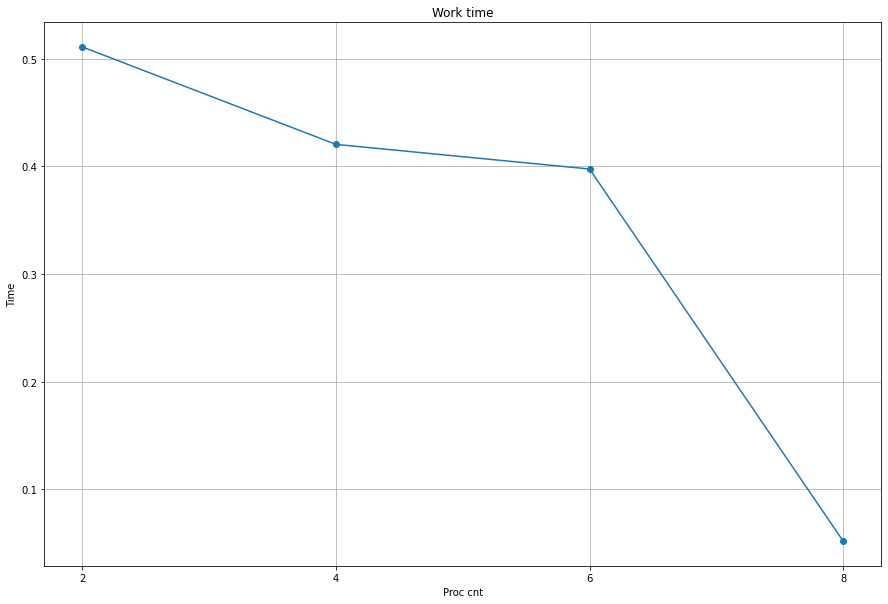

In [124]:
plt.figure(figsize=(15, 10))
plt.plot(proc_cnt_lst, time_lst, marker='o')
plt.title('Work time')
plt.xlabel('Proc cnt')
plt.ylabel('Time')
plt.grid()
plt.show()

Количество параллельных процессов по количеству ядер в процессоре. Выделить больше не получается